In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

In [2]:
df=pd.read_csv("Train_Test_IoT_GPS_Tracker.csv")

In [3]:
df

,ts,date,time,latitude,longitude,label,type
0,1556242299,25-Apr-19,18:31:39,116.521704,132.162504,1,ddos
1,1556242301,25-Apr-19,18:31:41,121.742933,135.072500,1,ddos
2,1556242306,25-Apr-19,18:31:46,121.795929,135.110198,1,ddos
3,1556242309,25-Apr-19,18:31:49,116.611216,132.224555,1,ddos
4,1556242311,25-Apr-19,18:31:51,121.841526,135.151362,1,ddos
...,...,...,...,...,...,...,...
58955,1554202928,2-Apr-19,4:02:08,1.028628,10.810522,0,normal
58956,1554202928,2-Apr-19,4:02:08,0.345361,10.727989,0,normal
58957,1554202928,2-Apr-19,4:02:08,0.423384,10.508036,0,normal
58958,1554202928,2-Apr-19,4:02:08,0.445292,10.381356,0,normal


In [4]:
df.describe()

,ts,latitude,longitude,label
count,5.896000e+04,58960.000000,58960.000000,58960.000000
mean,1.555005e+09,46.703771,56.840204,0.406377
std,1.094043e+06,74.735511,75.032361,0.491161
min,1.554061e+09,0.000000,10.000000,0.000000
25%,1.554061e+09,1.152564,11.162110,0.000000
50%,1.554183e+09,4.514077,14.421946,0.000000
75%,1.556247e+09,77.450045,87.454185,1.000000
max,1.556477e+09,549.381916,555.133643,1.000000


In [5]:
df.isnull().sum()

ts           0
date         0
time         0
latitude     0
longitude    0
label        0
type         0
dtype: int64

In [6]:
df['label'].value_counts()

0    35000
1    23960
Name: label, dtype: int64

In [7]:
df['type'].value_counts()

normal        35000
injection      5000
backdoor       5000
ddos           5000
password       5000
ransomware     2833
xss             577
scanning        550
Name: type, dtype: int64

In [8]:
num_msg= df.shape[0]
num_AttOrNormal = len(df["label"].unique()) 
name_AttOrNormal = ["0: Normal " , " 1: attack "]

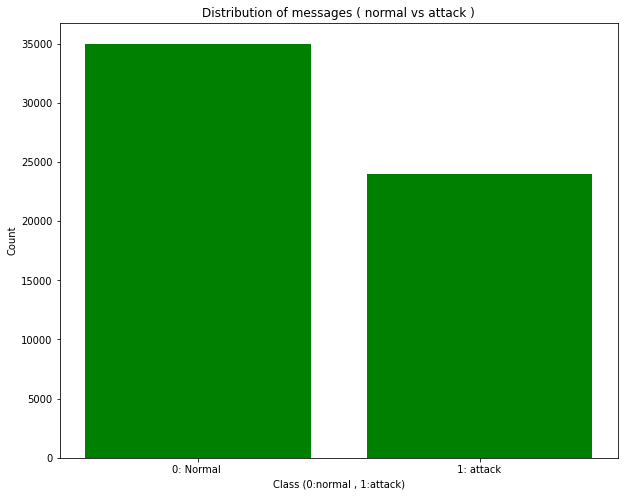

In [9]:
Count_per_classAttOrNormal = df["label"].value_counts()
percentage_per_classAttOrNormal = Count_per_classAttOrNormal*100/num_msg

fig = plt.figure(figsize=(10, 8))
bar_plot = plt.bar(name_AttOrNormal,Count_per_classAttOrNormal,color='green')


plt.xlabel('Class (0:normal , 1:attack)')
plt.ylabel('Count')
plt.title('Distribution of messages ( normal vs attack )')
plt.show()

In [10]:
len(df["type"].unique())

8

In [11]:
#labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
#df['typelabelCode'] = labelencoder.fit_transform(df['type'])
#df

In [12]:
name_class=['normal','backdoor','ddos', 'password',  'injection', 'ransomware',  'xss' ,'scanning']

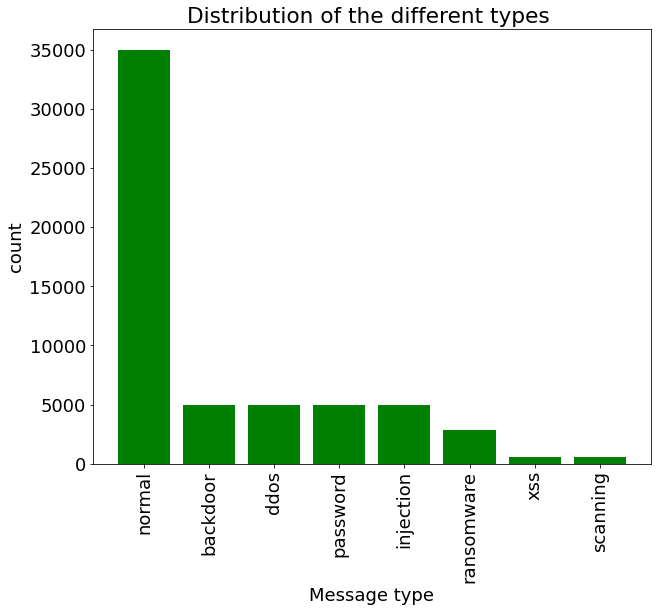

In [13]:
Count_per_class = df["type"].value_counts()

plt.rcParams.update({'font.size': 18})


fig = plt.figure(figsize=(10, 8))
bar_plot = plt.bar(name_class,Count_per_class,color='green')

plt.xticks(rotation=90)
plt.xlabel("Message type")
plt.ylabel("count")

plt.title('Distribution of the different types ')
plt.show()

## Label Encoding

In [14]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['labelCode'] = labelencoder.fit_transform(df['type'])
df

,ts,date,time,latitude,longitude,label,type,labelCode
0,1556242299,25-Apr-19,18:31:39,116.521704,132.162504,1,ddos,1
1,1556242301,25-Apr-19,18:31:41,121.742933,135.072500,1,ddos,1
2,1556242306,25-Apr-19,18:31:46,121.795929,135.110198,1,ddos,1
3,1556242309,25-Apr-19,18:31:49,116.611216,132.224555,1,ddos,1
4,1556242311,25-Apr-19,18:31:51,121.841526,135.151362,1,ddos,1
...,...,...,...,...,...,...,...,...
58955,1554202928,2-Apr-19,4:02:08,1.028628,10.810522,0,normal,3
58956,1554202928,2-Apr-19,4:02:08,0.345361,10.727989,0,normal,3
58957,1554202928,2-Apr-19,4:02:08,0.423384,10.508036,0,normal,3
58958,1554202928,2-Apr-19,4:02:08,0.445292,10.381356,0,normal,3


## Each class code equivalent

In [15]:
label_keys=df["type"].unique()
label_values=df["labelCode"].unique()
labels = {label_keys[i]: label_values[i] for i in range(len(label_keys))}
labels

{'ddos': 1,
 'backdoor': 0,
 'injection': 2,
 'normal': 3,
 'password': 4,
 'ransomware': 5,
 'scanning': 6,
 'xss': 7}

In [16]:
X=df[["longitude","latitude"]]
y=df["labelCode"]

In [17]:
from sklearn.preprocessing import StandardScaler
 

 
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
X=scaler.fit_transform(X)

X

array([[ 1.0038727 ,  0.93420817],
       [ 1.04265624,  1.00407152],
       [ 1.04315867,  1.00478064],
       ...,
       [-0.61750105, -0.61926088],
       [-0.61918939, -0.61896775],
       [-0.61966083, -0.6177983 ]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

print("Train Data size:", len(X_train))
print("Test Data size", len(X_test))

Train Data size: 44220
Test Data size 14740


In [20]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train.values)

GaussianNB()

In [22]:
y_pred = nb.predict(X_test)
y_train_pred=nb.predict(X_train)

In [23]:
from sklearn import metrics
print("The RF model accuracy for the training set is: ", metrics.accuracy_score(y_train,y_train_pred)*100)
print("The RF model accuracy for the test set is: ", metrics.accuracy_score(y_test,y_pred)*100)

The RF model accuracy for the training set is:  60.009045680687464
The RF model accuracy for the test set is:  60.359565807327



Test confusion_matrix


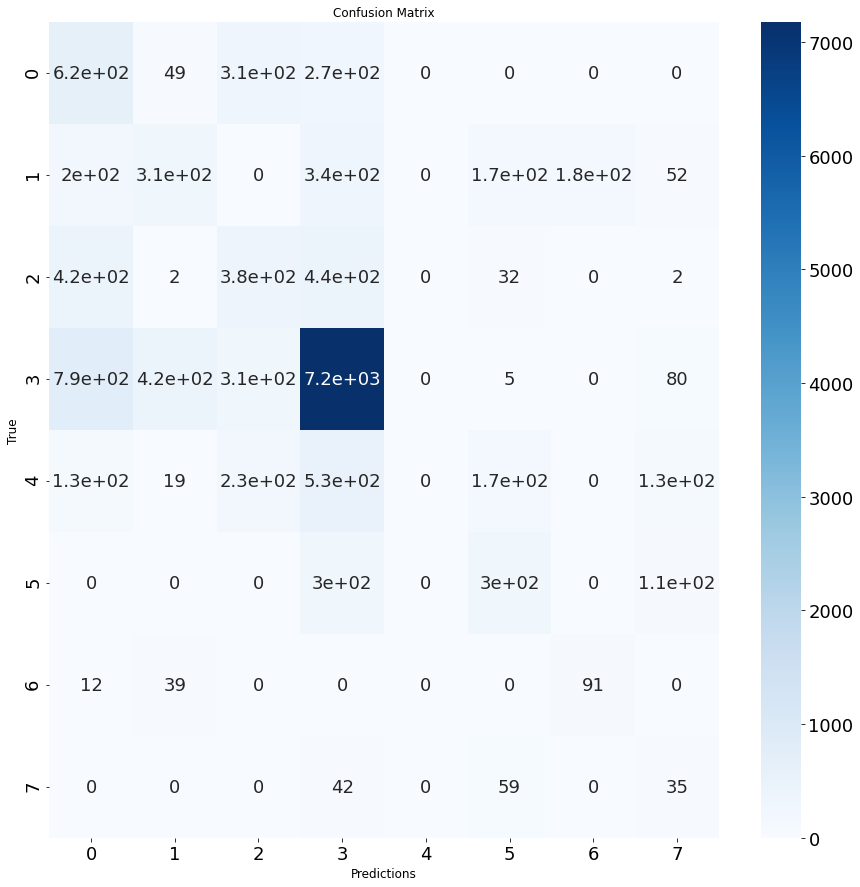

In [24]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
plt.figure(figsize=(15,15))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [25]:
y_train.value_counts()

3    26228
4     3787
0     3755
1     3745
2     3725
5     2131
7      441
6      408
Name: labelCode, dtype: int64

In [26]:
y_test.value_counts()

3    8772
2    1275
1    1255
0    1245
4    1213
5     702
6     142
7     136
Name: labelCode, dtype: int64

In [27]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred , average=None)
precision = precision_score(y_test, y_pred , average=None)
f1 = f1_score(y_test, y_pred, average=None)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
recallList=recall.tolist()
precisionList=precision.tolist()
f1lList=f1.tolist()

In [29]:
name_class=['ddos','backdoor','injection','normal','password','ransomware','scanning','xss']
name_class.sort()
name_class

['backdoor',
 'ddos',
 'injection',
 'normal',
 'password',
 'ransomware',
 'scanning',
 'xss']

In [30]:
recallDict={i:j for i,j in zip(name_class,recallList)}
precisionDict={i:j for i,j in zip(name_class,precisionList)}
f1Dict={i:j for i,j in zip(name_class,f1lList)}

## Average Recall

In [31]:
recallDict

{'backdoor': 0.4955823293172691,
 'ddos': 0.2446215139442231,
 'injection': 0.2972549019607843,
 'normal': 0.8177154582763337,
 'password': 0.0,
 'ransomware': 0.4202279202279202,
 'scanning': 0.6408450704225352,
 'xss': 0.25735294117647056}

## Average Precision

In [32]:
precisionDict

{'backdoor': 0.28380864765409386,
 'ddos': 0.3694344163658243,
 'injection': 0.3073803730738037,
 'normal': 0.7884150362717081,
 'password': 0.0,
 'ransomware': 0.4046639231824417,
 'scanning': 0.33455882352941174,
 'xss': 0.08684863523573201}

## Average F1 Score

In [33]:
f1Dict

{'backdoor': 0.3609242468558058,
 'ddos': 0.29434324065196543,
 'injection': 0.3022328548644338,
 'normal': 0.8027979854504755,
 'password': 0.0,
 'ransomware': 0.41229909154437455,
 'scanning': 0.4396135265700483,
 'xss': 0.12987012987012989}